In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('amazon.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2188,11-03-2019,283.519989,291.279999,280.500000,290.920013,290.920013,7392300
2189,12-03-2019,286.489990,288.070007,281.059998,283.359985,283.359985,7504100
2190,13-03-2019,283.899994,291.989990,282.700012,288.959991,288.959991,6844700
2191,14-03-2019,292.450012,295.390015,288.290009,289.959991,289.959991,7074200


In [3]:
df = df.reset_index()
df

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,29-06-2010,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,1,30-06-2010,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2,01-07-2010,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,3,02-07-2010,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,4,06-07-2010,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...,...
2188,2188,11-03-2019,283.519989,291.279999,280.500000,290.920013,290.920013,7392300
2189,2189,12-03-2019,286.489990,288.070007,281.059998,283.359985,283.359985,7504100
2190,2190,13-03-2019,283.899994,291.989990,282.700012,288.959991,288.959991,6844700
2191,2191,14-03-2019,292.450012,295.390015,288.290009,289.959991,289.959991,7074200


In [4]:
df = df.drop(['index', 'Date', 'Adj Close'], axis=1)
df

,Open,High,Low,Close,Volume
0,19.000000,25.000000,17.540001,23.889999,18766300
1,25.790001,30.420000,23.299999,23.830000,17187100
2,25.000000,25.920000,20.270000,21.959999,8218800
3,23.000000,23.100000,18.709999,19.200001,5139800
4,20.000000,20.000000,15.830000,16.110001,6866900
...,...,...,...,...,...
2188,283.519989,291.279999,280.500000,290.920013,7392300
2189,286.489990,288.070007,281.059998,283.359985,7504100
2190,283.899994,291.989990,282.700012,288.959991,6844700
2191,292.450012,295.390015,288.290009,289.959991,7074200


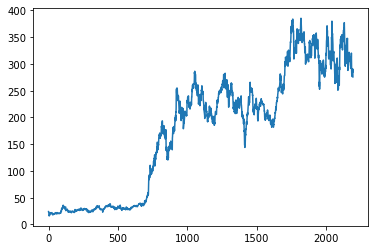

In [5]:
plt.plot(df.Close)

In [6]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2188    321.1557
2189    321.3934
2190    321.5171
2191    321.6989
2192    321.8141
Name: Close, Length: 2193, dtype: float64

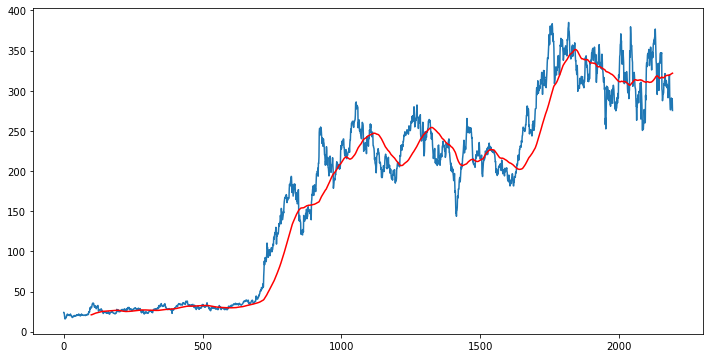

In [7]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [8]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2188    316.36460
2189    316.38605
2190    316.44160
2191    316.49715
2192    316.45550
Name: Close, Length: 2193, dtype: float64

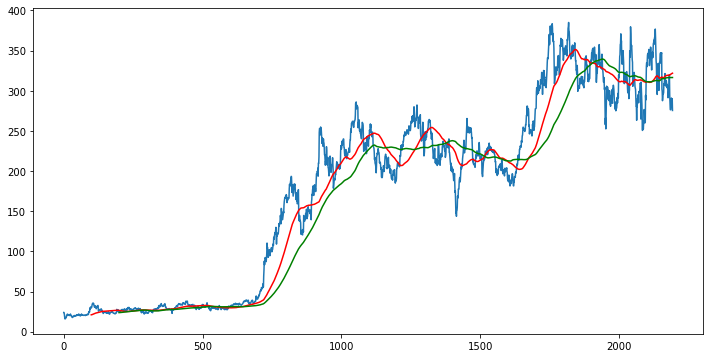

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [10]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):len(df)])
print(data_training)
print(data_testing)

           Close
0      23.889999
1      23.830000
2      21.959999
3      19.200001
4      16.110001
...          ...
1530  228.490005
1531  230.610001
1532  234.789993
1533  230.009995
1534  227.199997

[1535 rows x 1 columns]
           Close
1535  225.789993
1536  230.610001
1537  230.029999
1538  226.160004
1539  229.080002
...          ...
2188  290.920013
2189  283.359985
2190  288.959991
2191  289.959991
2192  275.429993

[658 rows x 1 columns]


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [12]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02993635],
       [0.02971433],
       [0.02279455],
       ...,
       [0.81035371],
       [0.79266573],
       [0.78226758]])

In [13]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train)
print(y_train)

[[[0.02993635]
  [0.02971433]
  [0.02279455]
  ...
  [0.05550621]
  [0.05132475]
  [0.05065867]]

 [[0.02971433]
  [0.02279455]
  [0.01258141]
  ...
  [0.05132475]
  [0.05065867]
  [0.05213883]]

 [[0.02279455]
  [0.01258141]
  [0.00114713]
  ...
  [0.05065867]
  [0.05213883]
  [0.05620929]]

 ...

 [[0.69123742]
  [0.71388393]
  [0.70078444]
  ...
  [0.79081553]
  [0.78704114]
  [0.794886  ]]

 [[0.71388393]
  [0.70078444]
  [0.70936943]
  ...
  [0.78704114]
  [0.794886  ]
  [0.81035371]]

 [[0.70078444]
  [0.70936943]
  [0.73767757]
  ...
  [0.794886  ]
  [0.81035371]
  [0.79266573]]]
[0.05213883 0.05620929 0.0651273  ... 0.81035371 0.79266573 0.78226758]


In [15]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [16]:
model = Sequential()

#layer 1
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, 
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

#layer 2
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

#layer 3
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

#layer 4
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 80)           45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 80)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [17]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
45/45 [==============================] - 5s 117ms/step - loss: 0.0620
Epoch 2/50
45/45 [==============================] - 6s 129ms/step - loss: 0.0136
Epoch 3/50
45/45 [==============================] - 5s 113ms/step - loss: 0.0120
Epoch 4/50
45/45 [==============================] - 5s 112ms/step - loss: 0.0087
Epoch 5/50
45/45 [==============================] - 5s 106ms/step - loss: 0.0097
Epoch 6/50
45/45 [==============================] - 5s 109ms/step - loss: 0.0093
Epoch 7/50
45/45 [==============================] - 5s 106ms/step - loss: 0.0096
Epoch 8/50
45/45 [==============================] - 5s 107ms/step - loss: 0.0088
Epoch 9/50
45/45 [==============================] - 5s 109ms/step - loss: 0.0085
Epoch 10/50
45/45 [==============================] - 5s 107ms/step - loss: 0.0082
Epoch 11/50
45/45 [==============================] - 5s 107ms/step - loss: 0.0078
Epoch 12/50
45/45 [==============================] - 5s 109ms/step - loss: 0.0080
Epoch 13/50
45/45 [======

In [ ]:
model.save('keras_model.h5')

In [18]:
data_testing.head()

,Close
1535,225.789993
1536,230.610001
1537,230.029999
1538,226.160004
1539,229.080002


In [19]:
past_100_days = data_training.tail(100)
frames = [past_100_days, data_testing]
final_df = pd.concat(frames, ignore_index=True)
final_df

,Close
0,207.500000
1,215.149994
2,218.339996
3,221.929993
4,226.380005
...,...
753,290.920013
754,283.359985
755,288.959991
756,289.959991


In [39]:
input_data = scaler.fit_transform(final_df)
input_data

array([[1.27978397e-01],
       [1.65561270e-01],
       [1.81233105e-01],
       [1.98870034e-01],
       [2.20732043e-01],
       [2.51977437e-01],
       [2.79390858e-01],
       [2.59346633e-01],
       [2.02063397e-01],
       [2.27462551e-01],
       [2.39793649e-01],
       [2.39155035e-01],
       [2.23237540e-01],
       [2.37386422e-01],
       [2.75804462e-01],
       [3.21984805e-01],
       [3.63645310e-01],
       [4.12527707e-01],
       [3.72144504e-01],
       [3.37116232e-01],
       [3.36379268e-01],
       [3.26062437e-01],
       [3.59027271e-01],
       [3.45910110e-01],
       [3.58928995e-01],
       [3.55833981e-01],
       [3.23851619e-01],
       [3.36624923e-01],
       [3.28371383e-01],
       [3.55195293e-01],
       [3.45713628e-01],
       [3.55146190e-01],
       [3.43994119e-01],
       [3.25522029e-01],
       [2.91378026e-01],
       [2.96487375e-01],
       [2.49914071e-01],
       [2.01965121e-01],
       [1.47776967e-01],
       [1.64480450e-01],


In [40]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [41]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test)
print(y_test)

[[[0.1279784 ]
  [0.16556127]
  [0.1812331 ]
  ...
  [0.26204861]
  [0.23856545]
  [0.2247605 ]]

 [[0.16556127]
  [0.1812331 ]
  [0.19887003]
  ...
  [0.23856545]
  [0.2247605 ]
  [0.21783343]]

 [[0.1812331 ]
  [0.19887003]
  [0.22073204]
  ...
  [0.2247605 ]
  [0.21783343]
  [0.24151316]]

 ...

 [[0.46740357]
  [0.44377303]
  [0.40510934]
  ...
  [0.50449529]
  [0.53780405]
  [0.50066316]]

 [[0.44377303]
  [0.40510934]
  [0.38590028]
  ...
  [0.53780405]
  [0.50066316]
  [0.52817486]]

 [[0.40510934]
  [0.38590028]
  [0.3905675 ]
  ...
  [0.50066316]
  [0.52817486]
  [0.53308766]]]
[2.17833433e-01 2.41513158e-01 2.38663725e-01 2.19651223e-01
 2.33996582e-01 2.17145647e-01 2.13510225e-01 2.16949169e-01
 2.16850888e-01 2.07123573e-01 2.05305858e-01 2.06632264e-01
 2.13952357e-01 2.03782832e-01 2.13166290e-01 2.02259874e-01
 1.94104689e-01 1.89339265e-01 1.65806925e-01 1.46843520e-01
 1.50135090e-01 9.49152872e-02 8.02259973e-02 1.05035641e-01
 9.95333319e-02 7.81626321e-02 6.3964646

In [42]:
scale = scaler.scale_
scale_factor = 1/scale[0]
y_predicted = model.predict(x_test)
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

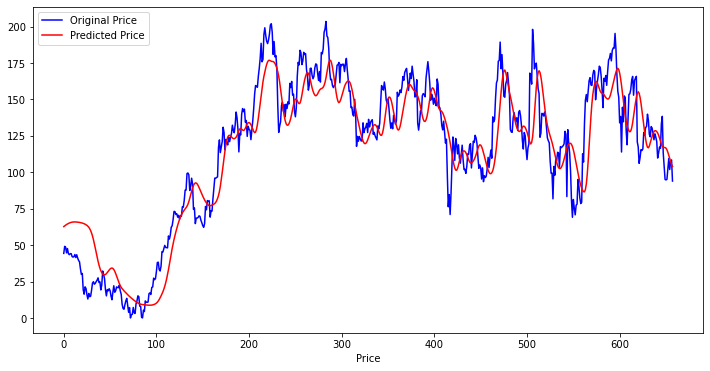

In [24]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.xlabel('Price')
plt.legend()
plt.show()